### Intro to pyplot

#### matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

__In matplotlib.pyplot various states are preserved across function calls__, so that it keeps track
of things like the current figure and plotting area, and the plotting functions are directed to
the current axes (please note that ”axes” here and in most places in the documentation refers
to the axes part of a figure and not the strict mathematical term for more than one axis).


Generating visualizations with pyplot is very quick

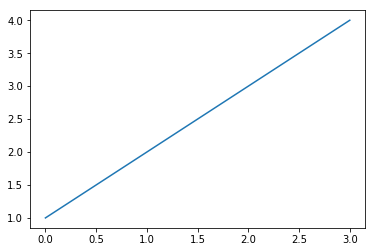

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.show()
#x=range(len(y)), since python vector starts from 0

If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and
automatically generates the x values for you

plot() is a versatile command, and will take an arbitrary number of arguments. For example,
to plot x versus y, you can issue the command:

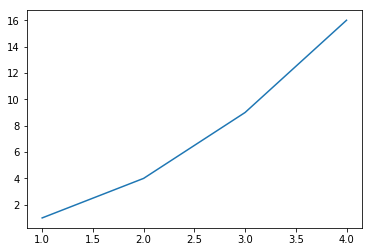

In [6]:
#simple plot square plot - default line foramte blue dotted line(blue line)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatting the style of your plot

For every x, y pair of arguments, there is __an optional third argument which is the format string
that indicates the color and line type of the plot.__ The letters and symbols of the format string
are from MATLAB, and you concatenate a color string with a line style string. The __default
format string is ’b-’__, which is a solid blue line. 

For example, to plot the above with red circles, you would issue

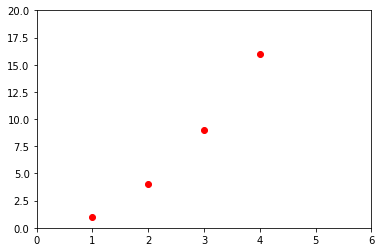

In [7]:
#simple plot square plot with formated line
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

 #### The axis() command in the example above takes a list of ``[xmin, xmax, ymin, ymax]`` and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. __In fact, all sequences are converted to numpy
arrays internally.__ The example below illustrates a plotting several lines with different format
styles in one command using arrays.

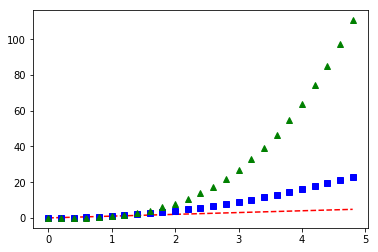

In [3]:
#line plots with different formats
import numpy as np
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

#### Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.


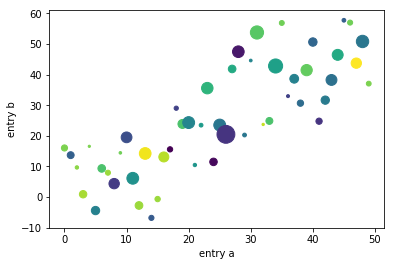

In [4]:
#Plotting with keyword strings --- scatter plot with dictionary
import numpy as np
data = {'a': np.arange(50), 'c': np.random.randint(0, 50, 50), 'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

#c for color and d for scatter area
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass
categorical variables directly to many plotting functions. For example:

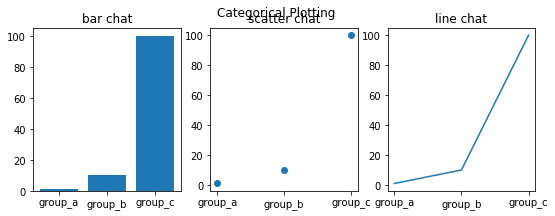

In [6]:
#Plotting with categorical variables
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names, values)
plt.title('bar chat')
plt.subplot(132)
plt.scatter(names, values)
plt.title('scatter chat')
plt.subplot(133)
plt.plot(names, values)
plt.title('line chat')
plt.suptitle('Categorical Plotting')
plt.show()

### Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see
matplotlib.lines.Line2D. There are several ways to set line properties

#### 1. Use keyword args:

plt.plot(x, y, linewidth=2.0)

__2. Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g.,
line1, line2 = plot(x1, y1, x2, y2).__ In the code below we will suppose that we have
only one line so that the list returned is of length 1. __We use tuple unpacking with line__,
to get the first element of that list:

line, = plt.plot(x, y, '-')

line.set_antialiased(False) # turn off antialiasing

#### 3. Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

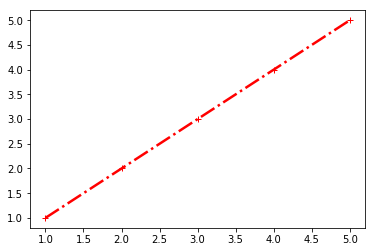

In [12]:
#plot styles
array_2d = np.array([[1,2,3,4,5], [1,2,3,4,5]])
plt.plot(array_2d[0], array_2d[1], linewidth = 2.5, color = 'red', marker = '+' , linestyle = "-.")
plt.show()

To get a list of settable line properties, call the setp() function with a line or lines as argument

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  antialiased: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth: float
  marker: unknown
  markeredgecolor: color
  markeredgewidth: float
  markerfacecolor: color
  markerfacecoloralt: color
  markersize: float
  markevery: unknown
  path_effects: `.AbstractPathEffect`
  picker: float or callable[[Arti

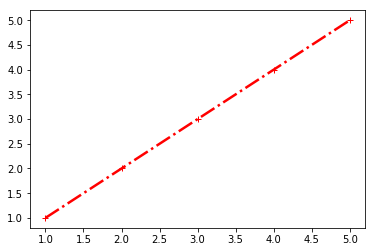

In [11]:
array_2d = np.array([[1,2,3,4,5], [1,2,3,4,5]])
line1, = plt.plot(array_2d[0], array_2d[1], linewidth = 2.5, color = 'red', marker = '+' , linestyle = "-.")
plt.setp(line1)

### Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. __All plotting commands apply to the current axes__. The function __gca()__ returns the current axes (a matplotlib.axes.Axes instance), and __gcf()__ returns the current figure (matplotlib.figure.Figure instance). 

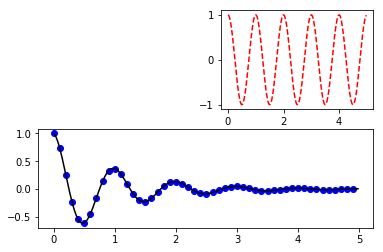

In [10]:
#Working with multiple figures and axes
#Multiple subplots
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure()
plt.subplot(212)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
#plt.show()
plt.subplot(222)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


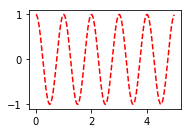

In [7]:
plt.figure()
plt.subplot(212)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
#plt.show()
plt.subplot(223)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

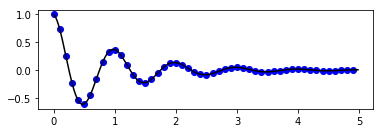

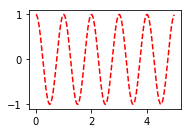

In [8]:
plt.figure()
plt.subplot(212)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.show()
plt.subplot(223)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don’t manually specify any axes. The subplot() command specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows*numcols. The commas in the subplot command are optional if numrows*numcols<10. So subplot(211) is identical to subplot(2, 1, 1).

You can create an arbitrary number of subplots and axes. __If you want to place an axes manually, i.e., not on a rectangular grid__, use the axes() command, which allows you to specify the location as __axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates__

You can create multiple figures by using multiple figure() calls with an increasing figure
number. Of course, each figure can contain as many axes and subplots as your heart desires:

Text(0.5, 0.98, 'Easy as 1, 2,3')

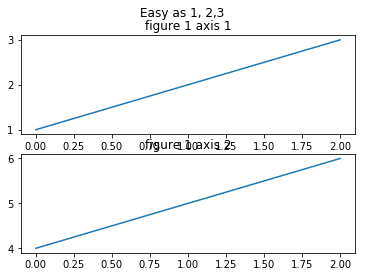

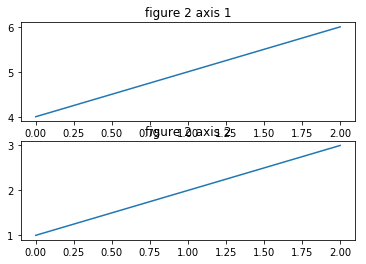

In [21]:
#Multiple figures
plt.figure(1)
plt.subplot(211)
plt.plot([1,2,3])
plt.title("figure 1 axis 1")
plt.subplot(212)
plt.plot([4,5,6])
plt.title("figure 1 axis 2")

plt.figure(2)
plt.subplot(211)
plt.plot([4,5,6])
plt.title("figure 2 axis 1")

plt.subplot(212)
plt.plot([1,2,3])
plt.title("figure 2 axis 2")

plt.figure(1)
plt.subplot(211)
plt.suptitle('Easy as 1, 2,3')

Text(0.5, 1.0, 'Easy as 1, 2, 3')

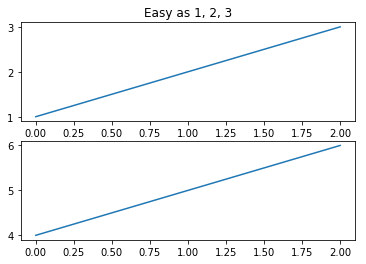

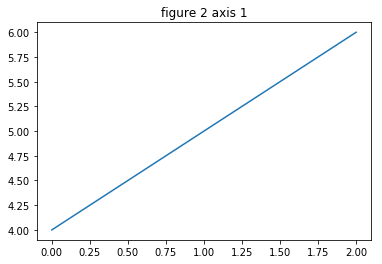

In [14]:
import matplotlib.pyplot as plt
plt.figure(1) # the first figure
plt.subplot(211) # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212) # the second subplot in the first figure
plt.plot([4, 5, 6])
plt.figure(2) # a second figure
plt.plot([4, 5, 6]) # creates a subplot(111) by default
plt.title("figure 2 axis 1")
plt.figure(1) # figure 1 current; subplot(212) still current
plt.subplot(211) # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with __clf()__ and the current axes with __cla()__. If you find it annoying that states (specifically the current image, figure and axes) are being maintained for you behind the scenes

If you are making lots of figures, you need to be aware of one more thing: __the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough__, because pyplot maintains internal references until close() is called

### Working with text

#### The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations


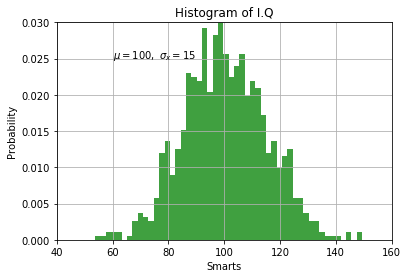

In [27]:
#text() command
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)
n, bins, pathces = plt.hist(x, 50, facecolor='g', density=1, alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("Histogram of I.Q")
plt.text(60, 0.025, r'$\mu=100,\ \sigma_x=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


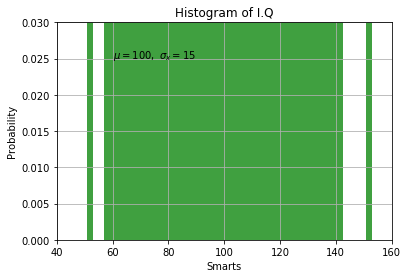

In [28]:
#text() command
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)
n, bins, pathces = plt.hist(x, 50, facecolor='g', density=0, alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("Histogram of I.Q")
plt.text(60, 0.025, r'$\mu=100,\ \sigma_x=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


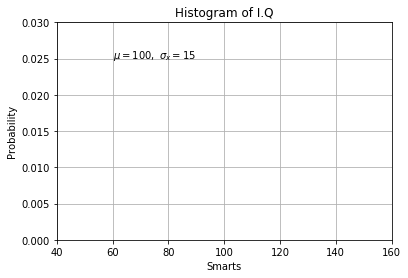

In [29]:
#text() command
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)
n, bins, pathces = plt.hist(x, 50, facecolor='g', density=1, alpha=0)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("Histogram of I.Q")
plt.text(60, 0.025, r'$\mu=100,\ \sigma_x=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can __customize the properties by passing keyword arguments into the text functions or using setp()__:

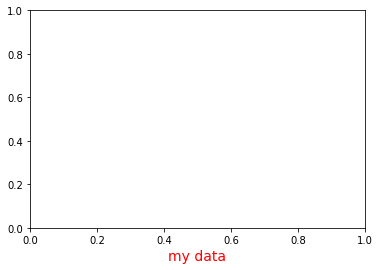

In [30]:
t = plt.xlabel('my data', fontsize=14, color='red')

#### Using mathematical expressions in text

matplotlib accepts TeX equation expressions in any text expression. For example to write the expression σi = 15 in the title, you can write a TeX expression surrounded by dollar signs:

Text(0.5, 1.0, '$\\sigma_i=15$')

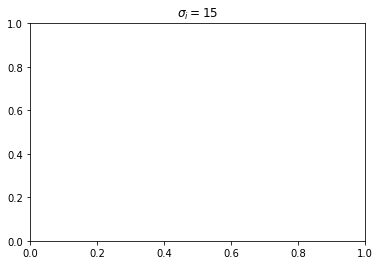

In [32]:
plt.title(r'$\sigma_i=15$')

The r preceding the title string is important – it signifies that the string is a raw string and not
to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts

### Annotating text

The uses of the basic __text() command above place text at an arbitrary position on the Axes__. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. __In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples__

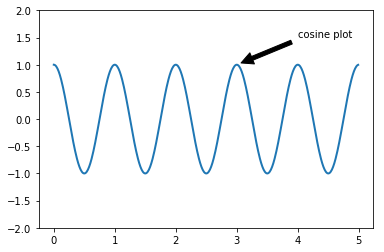

In [33]:
#Annotating text
ax=plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, =plt.plot(t, s, lw=2)
plt.annotate('cosine plot', xy=(3,1), xytext=(4,1.5), arrowprops=dict(facecolor='black', shrink=0.07))
plt.ylim(-2, 2)
plt.show()

In this basic example, both the xy (arrow tip) and xytext locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose

### Logarithmic and other nonlinear axes

matplotlib.pyplot supports __not only linear axis scales, but also logarithmic and logit scales__. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:__plt.xscale(’log’)__

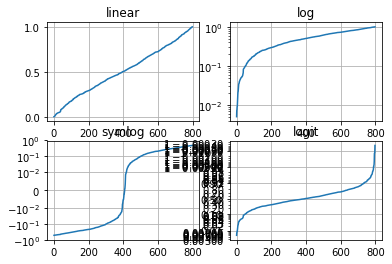

In [10]:
from matplotlib.ticker import NullFormatter # useful for `logit` scale
import numpy as np
import matplotlib.pyplot as plt
# Fixing random state for reproducibility
np.random.seed(19680801)
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))
# plot with various axes scales
plt.figure()
# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)
# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)
# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)
# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
plt.show()

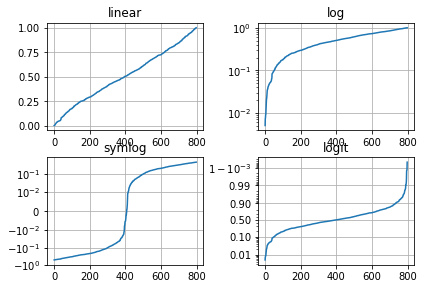

In [15]:
from matplotlib.ticker import NullFormatter # useful for `logit` scale
import numpy as np
import matplotlib.pyplot as plt
# Fixing random state for reproducibility
np.random.seed(19680801)
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))
# plot with various axes scales
plt.figure()
# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)
# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)
# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)
# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()